#### SVM(Support Vector Machine)

#### import library

In [101]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os

#         # 환경경변수를 사용하여 로깅을 제어:
#         # 기본-0/ INFO 로그로 필터링:1/ WARNING 로그로 필터:2, Error 로그를 추가로 필터링: 3  설정
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


#### training dataset : 40% / test dataset : 60%  

In [102]:
# sklearn에서 제공하는 iris 데이터 호출
iris = datasets.load_iris()

            # sklearn에서 제공하는 model_selection  패키지에서 제공하는 train_test_split() 메서드를 활용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)   # 값을 동일하게

X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape


(120, 4)

In [103]:
# SVM model accuracy
#svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
#svm.fit(X_train, y_train)

model = svm.SVC(kernel='linear', C=1.0, gamma=0.5)  # kernel = 'linear' : 선형 커널을 사용하여 데이터를 분류,
                                                    # c=1.0: 오류에 대한 패널티를 조절하는 하이퍼파라미터(값이 크면 오분류 패널티가 커져 과적합 가능성 높아짐)
                                                    # gamma=0.5 : RBF 커널(Radial Basis Function: 방사 기저 함수: 비선형 커널 - SVM, PCA 에서 주로 사용) 파라미터, 데어티 포인트이 영향력 조절, 선형커널을 사용하므로 직접적 영향 없음.
                                                    #                                                                                (Principle Component Analysis : 주성분 분석 - 차원을 줄이기 위함(unsupervised leanring에 많이 사용))
model.fit(X_train, y_train)                         # 훈련 데이터를 사용하여 svm 분류기를 훈련

predictions = model.predict(X_test)                 # 훈련된 모델을 사용하여 테스트 데이터에서 예측
score = metrics.accuracy_score(y_test, predictions)
print("정확도: {0:0.3f}".format(score))


정확도: 1.000


# a little bit more.....

In [104]:
print(y_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [105]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# SVM 2


Text(0, 0.5, 'sepal width (cm)')

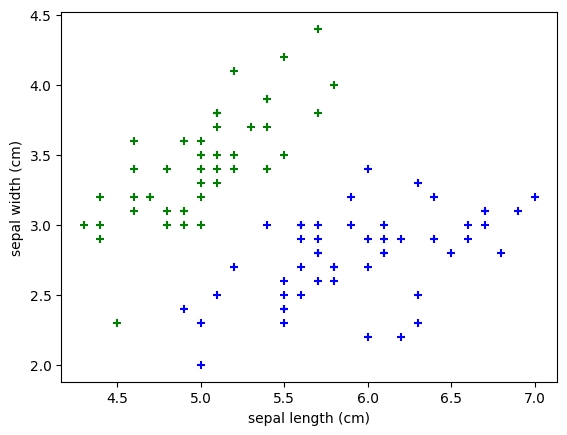

In [98]:
#iris = datasets.load_iris()

iris.feature_names
['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 데이터 프레임을 만들어줌

df['target'] = iris.target
# 'target' feature를 만들어줌

iris.target_names
# 'setosa'=0, 'versicolor'=1, 'virginica'=2
np.array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# iris의 target_names을 apply하여 이름을 나타내어줌
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')



Text(0, 0.5, 'petal width (cm)')

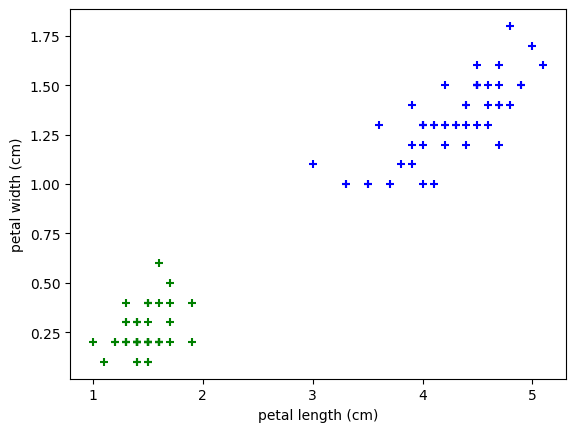

In [99]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


In [100]:
X = df.drop(['target', 'flower_name'], axis = 'columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC(C=10)
# C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)이다.
# shift tab으로 SVC확인!(여러 파라미터들이 있다.)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9333333333333333